In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv("Q2.csv")
df2=pd.read_csv("Q1.csv")
df = pd.concat([df1, df2], ignore_index=True)

In [69]:
df['DATE'] = pd.to_datetime(df['DATE'])



df.set_index('DATE', inplace=True)
df = df.sort_index()
df = df[['CLOSE','OPEN']]
df.dropna(inplace=True)
# Remove commas and convert CLOSE to float
df['CLOSE'] = (
    df['CLOSE']
    .astype(str)
    .str.replace(',', '', regex=True)
    .astype(float)
)
df.head()




,CLOSE,OPEN
DATE,,
2023-12-18,2521.00,"2,495.60"
2023-12-19,2558.10,"2,555.00"
2023-12-20,2527.15,"2,571.05"
2023-12-21,2562.55,"2,527.00"
2023-12-22,2565.05,"2,559.60"


In [70]:
def SMA(series, window):
    return series.rolling(window).mean()


In [71]:
def EMA(series, window):
    return series.ewm(span=window, adjust=False).mean()


In [72]:
def RSI(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()

    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


In [73]:
def MACD(series):
    ema12 = series.ewm(span=12, adjust=False).mean()
    ema26 = series.ewm(span=26, adjust=False).mean()
    macd = ema12 - ema26
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal



In [74]:
def Bollinger_Bands(series, window=20):
    sma = series.rolling(window).mean()
    std = series.rolling(window).std()
    upper = sma + 2 * std
    lower = sma - 2 * std
    return upper, lower


In [75]:
def ROC(series, window=12):
    return ((series - series.shift(window)) / series.shift(window)) * 100


In [76]:
df['SMA_20'] = SMA(df['CLOSE'], 20)
df['EMA_20'] = EMA(df['CLOSE'], 20)
df['RSI_14'] = RSI(df['CLOSE'])
df['ROC_12'] = ROC(df['CLOSE'])

df['MACD'], df['Signal'] = MACD(df['CLOSE'])
df['Upper_BB'], df['Lower_BB'] = Bollinger_Bands(df['CLOSE'])

df.tail()


,CLOSE,OPEN,SMA_20,EMA_20,RSI_14,ROC_12,MACD,Signal,Upper_BB,Lower_BB
DATE,,,,,,,,,,
2025-12-10,1536.9,"1,534.00",1539.760,1531.701911,44.839255,0.065108,16.155454,22.193107,1574.840203,1504.679797
2025-12-11,1545.0,"1,536.90",1541.465,1532.968396,49.353796,0.344223,15.391920,20.832870,1573.850395,1509.079605
2025-12-12,1556.5,"1,550.80",1543.345,1535.209501,58.266453,-0.853558,15.535683,19.773432,1574.559199,1512.130801
2025-12-15,1556.2,"1,551.20",1545.240,1537.208596,56.812552,-0.460535,15.447341,18.908214,1574.598861,1515.881139
2025-12-16,1542.3,"1,545.00",1546.385,1537.693492,36.832061,-1.607656,14.093257,17.945222,1573.174415,1519.595585


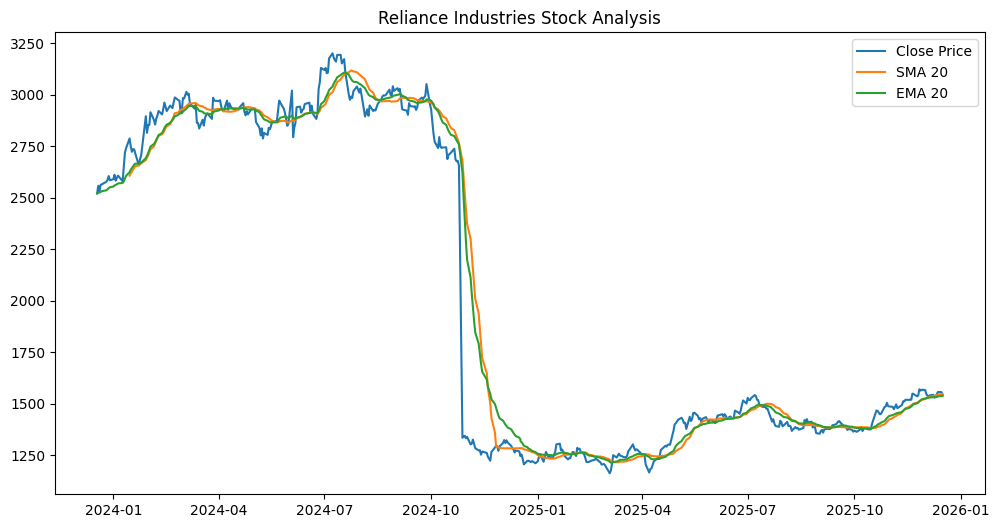

In [77]:
plt.figure(figsize=(12,6))
plt.plot(df['CLOSE'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20')
plt.plot(df['EMA_20'], label='EMA 20')
plt.legend()
plt.title("Reliance Industries Stock Analysis")
plt.show()


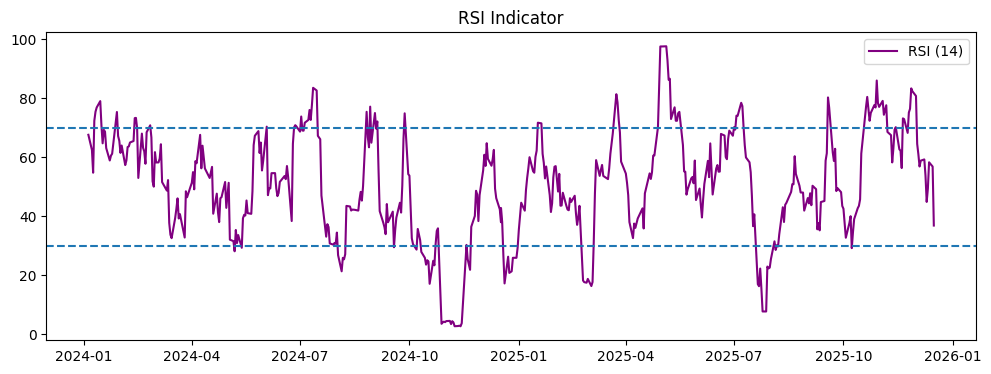

In [78]:
plt.figure(figsize=(12,4))
plt.plot(df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, linestyle='--')
plt.axhline(30, linestyle='--')
plt.title('RSI Indicator')
plt.legend()
plt.show()


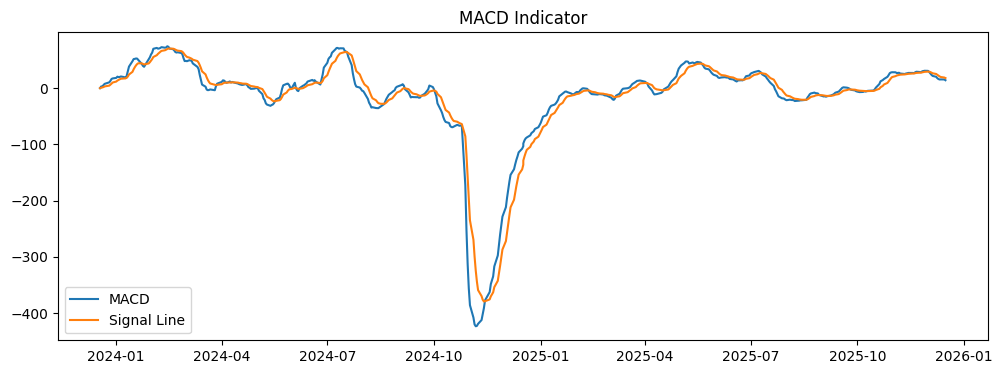

In [79]:
plt.figure(figsize=(12,4))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['Signal'], label='Signal Line')
plt.title('MACD Indicator')
plt.legend()
plt.show()


In [80]:
print("Total rows:", len(df))
print("Start date:", df.index.min())
print("End date:", df.index.max())


Total rows: 498
Start date: 2023-12-18 00:00:00
End date: 2025-12-16 00:00:00
